## Creating a Neural Network from Scratch

In [10]:
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read in data
data = pickle.load(open('backprop-data.pkl', 'rb'), encoding='latin1')

In [4]:
labels = data['labels']
training = data['vectors']
training = training.T

In [5]:
class neural_network():
    # 2 inputs and one bias term projecting to ten units in hidden layer
    first_layer_weights = np.random.rand(3, 10)
    
    # 10 hidden units and bias term projecting to output
    second_layer_weights = np.random.rand(11)
    a,b,y,z = 0,0,0,0
    learning_rate = 0.1

    def forward_propogation(self, x):
        # Add in bias 
        x.append(1)
        x = np.array(x)
        self.a, self.b, self.y, self.z = np.zeros(10), 0, np.zeros(11), 0
        # bias term
        self.y[10] = 1

        # 10 units in hidden layer
        for i in range(10):
            
            # 3 inputs including the bias
            for j in range(3):
                
                # input times weight for each unit
                self.a[i] = self.a[i] + (x[j] * self.first_layer_weights[j][i])
                
            # z = tanh(a)
            self.y[i] = np.tanh(self.a[i])
        
        # 11 units in hidden layer (10+1 bias)
        for i in range(11):
            # Propogate from hidden layer to final unit
            self.b = self.b + (self.y[i] * self.second_layer_weights[i])
            
        # z = 1/(1+e^-a)
        self.z = 1/(1 + np.exp(-1 * self.b)) 

    def back_propogation(self, x, target):
        first_layer_weights_update = np.zeros_like(self.first_layer_weights)
        second_layer_weights_update = np.zeros_like(self.second_layer_weights)
        
        derivative = (1/(1 + np.exp(-1 * self.b))) * (1 - (1/(1 + np.exp(-1 * self.b))))
        for i in range(11):
            second_layer_weights_update[i] = self.learning_rate * (target - self.z) * derivative * self.y[i]
    
        for i in range(10):
            derivative_2 = 1 - (np.tanh(self.a[i]))**2
            for j in range(3):
                first_layer_weights_update[j][i] = self.learning_rate * (target - self.z) * derivative_2 * self.second_layer_weights[i] * derivative * x[j]

        self.second_layer_weights = self.second_layer_weights + second_layer_weights_update
        self.first_layer_weights = self.first_layer_weights + first_layer_weights_update
test_network = neural_network()

In [6]:
# Used for countour generation over range [-8,8]
lin_values = np.linspace(-8,8,100)
values = np.zeros((len(lin_values),len(lin_values)))

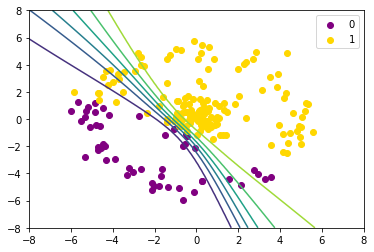

In [7]:
# Create contour 
for i in range(100):
    for j in range(100):
        inputs = [lin_values[i],lin_values[j]]
        test_network.forward_propogation(inputs)
        value = test_network.z
        values[i, j] = value

# Index training set
arr = np.array(training)
xz = arr[:,0]
yz = arr[:,1]

# Create empty lists to append values from set
x_less_than_threshold, y_less_than_threshold, x_more_than_threshold, y_more_than_threshold = [], [], [], []

for i in range(len(xz)):
    inputs = [xz[i],yz[i]]
    test_network.forward_propogation(inputs)
    value = test_network.z
    # Create threshold for where point is allotted
    if value > 0.5:
        x_more_than_threshold.append(xz[i])
        y_more_than_threshold.append(yz[i])
    else:
        x_less_than_threshold.append(xz[i])
        y_less_than_threshold.append(yz[i])

plt.contour(lin_values,lin_values,values)
plt.scatter(x_less_than_threshold, y_less_than_threshold, c="purple", label = '0')
plt.scatter(x_more_than_threshold, y_more_than_threshold, c="gold", label = '1')
plt.legend()
plt.show()

In [8]:
# Train
for j in range(1000):
    for i in range(len(training)):
        a = [training[i][0], training[i][1]]
        test_network.forward_propogation(a)
        test_network.back_propogation(a, labels[i])

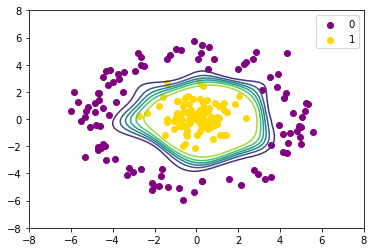

In [9]:
# Used for contour generation
for i in range(100):
    for j in range(100):
        inputs = [lin_values[i],lin_values[j]]
        test_network.forward_propogation(inputs)
        value = test_network.z
        values[i, j] = value

# Index training set
arr = np.array(training)
xz = arr[:,0]
yz = arr[:,1]

# Create empty lists to append values from set
x_less_than_threshold, y_less_than_threshold, x_more_than_threshold, y_more_than_threshold = [], [], [], []

for i in range(len(xz)):
    inputs = [xz[i],yz[i]]
    test_network.forward_propogation(inputs)
    value = test_network.z
    if value > 0.5:
        x_more_than_threshold.append(xz[i])
        y_more_than_threshold.append(yz[i])
    else:
        x_less_than_threshold.append(xz[i])
        y_less_than_threshold.append(yz[i])

plt.contour(lin_values,lin_values,values)
plt.scatter(x_less_than_threshold, y_less_than_threshold, c="purple", label = '0')
plt.scatter(x_more_than_threshold, y_more_than_threshold, c="gold", label = '1')
plt.legend()
plt.show()